<a href="https://colab.research.google.com/github/jeffersonverissimo/Data_Science/blob/master/Estudo_de_Caso_da_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto by [Jefferson Veríssimo](https://www.linkedin.com/in/jefferson-verissimo/)

O estudo desenvolvido no presente projeto baseia-se nas aulas do curso **Data Science na Prática 2.0** da [Sigmoidal](https://sigmoidal.ai), ministrado pelo professor [Carlos Melo](https://www.linkedin.com/in/carlosfab/?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3BNu4sRrmMTYaLBGQSefJnFQ%3D%3D&).

![alt text](https://cdn.pixabay.com/photo/2016/11/09/16/24/virus-1812092_960_720.jpg)

---
# **ANÁLISES EXPLORATÓRIA E PREDITIVA DOS CASOS DE COVID-19 NO BRASIL**

---
---

>**A origem do Coronavírus**

Os coronavírus são uma grande família viral, que vem sendo estudada desde a década de 1960, que causam vários tipos doenças infecciosas em animais silvestres, animais de criação e animais de estimação. E os mais recentes hospedeiros, os seres humanos.

Segundo o Ministério da Saúde, os primeiros coronavírus humanos foram isolados pela primeira vez em 1937. No entanto, foi em 1965 que o vírus foi descrito como coronavírus, em decorrência do perfil na microscopia, parecendo uma coroa.

>**Manifestações Clínicas**

Geralmente, em humanos, vários coronavírus causam doenças respiratórias leves ou moderadas, semelhantes a um resfriado comum. Os sintomas podem envolver coriza, tosse, dor de garganta e febre. Contudo, em alguns casos, as pessoas podem desenvolver infecções nas vias respiratórias inferiores, como pneumonia ou doenças mais graves, como a Síndrome Respiratória do Oriente Médio (MERS-CoV) e a Síndrome Respiratória Aguda Grave (SARS-CoV). O coronavírus recentemente descoberto é o causador da doença COVID-19.

>**O que é a COVID-19? Quais os seus sintomas?**

É uma doença infecciosa causada pelo novo coronavírus, descoberto recentemente a paritr do início do surto em Wuhan, capital e maior cidade da província de Hubei, na China, em dezembro de 2019.

De acordo com a Organização Mundial da Saúde, os sintomas mais comuns da COVID-19 são febre, cansaço e tosse seca. Sendo que alguns pacientes podem apresentar dores, congestão nasal, dor de garganta e diarreia. As pessoas idosas e as que têm doenças crônicas, como hipertensão ou problemas cardíacos e diabetes, possuem maior probabilidade de desenvolver doenças graves.

>**Panorama da COVID-19 no Brasil**

A pandemia do coronavírus teve início oficial no Brasil em 26 de feveriro de 2020, quando o primeiro caso de infecção foi confirmado pelo Ministério da Saúde. O paciente foi um homem de 61 anos que viajou à Itália, e deu entrada no Hospital Albert Einstein no dia anterior. 
À essa altura, os casos de COVID-19 estavam avançados no restante do mundo, especialmente nos países eupopeus e asiáticos.
Cerca de um mês depois, o Brasil já registrava mais de 2,4 mil casos de infecção e 57 mortes.

Atualmente (junho de 2020), o país registra o segundo maior número de casos de COVID-19 no mundo, atrás apenas dos EUA.

---

### **AQUISIÇÃO DOS DADOS**

>**PROPOSTA DESTE ARTIGO**

Atualmente, o país infrenta um problema acerca dos dados relacionados à pandemia, havendo conflitos entre os dados divulgados pelo Ministério da Saúde e governos estaduais. Dificultando ainda mais as análises desses dados, na tentativa de modelar e entender o atual cenário enfrentado pelo Brasil.

Este *notebook* apresenta análises exploratória e preditiva baseada nos dados epidemiológicos do coronavírus disponibilizados pela ***Our World in Data*** através do seu [repositório no *GitHub*](https://github.com/owid/covid-19-data/tree/master/public/data). A partir de técnicas de previsão de séries temporais, é apresentada uma previsão do comportamento da pandemia da COVID-19 no Brasil.

Outras bases de dados que podem ser utilizadas para o estudo da COVID-19:

*   [Ministério da Saúde](https://covid.saude.gov.br)
*   [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)
*   [Brasil.io](https://brasil.io/home/)


>**Metodologia**

A **análise preditiva** deste projeto foi realizada utilizando uma ferramenta *open source* desenvolvida pelo Facebook, o **Prophet**, *framework* de *forecasting* para séries temporais, que nos permite fazer previsões a partir de um determinado conjunto de dados. 

<center><img alt="Analisando Airbnb" width="15%" src="https://nextjournal.com/data/QmQfcfJDCwjxdNPMRTJZGbS8duREqmNXM7mVhXYcr3KPGE?content-type=image%2Fpng&filename=prophet-logo.png"></center>


Você pode conferir os detalhes sobre esta ferramenta neste [link](https://facebook.github.io/prophet/).

---


### **ANÁLISE EXPLORATÓRIA INICIAL**

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:

*   `owid-covid-data.csv`

O conjunto de dados usado neste projeto contém atualizações até o dia **19 de junho de 2020**, e pode ser acessado através deste [link](https://github.com/jeffersonverissimo/datasets).

In [ ]:
# IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS PARA REALIZAR AS ANÁLISES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet

In [ ]:
# IMPORTAÇÃO DOS CONJUNTOS DE DADOS A SEREM ANALISADOS

# Obs.: O dataset utilizado contém dados sobre a COVID-19 a nível global.

df_global = pd.read_csv('https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/owid-covid-data.csv')

In [ ]:
# VISUALIZAÇÃO DAS 5 PRIMEIRAS LINHAS DO DATASET

df_global.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


**Para auxiliar no entendimento do conjunto de dados, abaixo é mostrada uma tabela que descreve com detalhes as variáveis presentes:**

**VARIÁVEL** | **DESCRIÇÃO**
--- | ---
iso_code | ISO 3166-1 alfa-3 - códigos de países com três letras
continent | Continente da localização geográfica
location | Localização geográfica
date | Data de observação
total_cases | Total de casos confirmados de COVID-19
new_cases | Novos casos confirmados de COVID-19
total_deaths | Total de mortes atribuídas ao COVID-19
new_deaths | Novas mortes atribuídas ao COVID-19
total_cases_per_million | Total de casos confirmados de COVID-19 por 1 milhão de pessoas
new_cases_per_million | Novos casos confirmados de COVID-19 por 1 milhão de pessoas
total_deaths_per_million | Total de mortes atribuídas ao COVID-19 por 1 milhão de pessoas
new_deaths_per_million | Novas mortes atribuídas ao COVID-19 por 1 milhão de pessoas
total_tests	| Total de testes para COVID-19
new_tests	| Novos testes para a COVID-19
total_tests_per_thousand | Total de testes para COVID-19 por 1.000 pessoas
new_tests_per_thousand	| Total de novos testes para COVID-19 por 1.000 pessoas
new_tests_smoothed	| Novos testes para COVID-19 (Para países que não relatam dados de teste diariamente)
new_tests_smoothed_per_thousand	| Novos testes para COVID-19 (7 dias regularizados) por 1.000 pessoas
tests_units	| Unidades usadas pelo local para relatar seus dados de teste
stringency_index	| Índice de Rigidez da Resposta do Governo: ex: fechamento de escolas. Para um valor de 0 a 100 (100 = resposta mais estrita)
population	| Popolação em 2020
population_density	| Densidade populacional em 2020
median_age	| Idade média da população, projeção da ONU para 2020
aged_65_older	| Proporção da população com 65 anos ou mais, ano mais recente disponível
aged_70_older	| Percentagem da população com 70 anos ou mais em 2015
gdp_per_capita	| Produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
extreme_poverty	| Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
cvd_death_rate	| Taxa de mortalidade por doenças cardiovasculares em 2017
diabetes_prevalence	| Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
female_smokers	| Percentagem de mulheres que fumam, último ano disponível
male_smokers	| Proporção de homens que fumam, último ano disponível
handwashing_facilities	| Proporção da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível
hospital_beds_per_thousand	| Leitos de hospital por 1.000 pessoas, último ano disponível desde 2010
life_expectancy| Expectativa de vida no nascimento em 2019

**A partir do conhecimento inicial do *dataset*, podemos extratir algumas informações básicas desse conjunto de dados.**

In [ ]:
# VERIFICANDO O TAMANHO DO DATASET

df_global.shape

(24535, 34)

Esse conjunto de dados é composto por **24535 linhas** e **34 colunas**.

In [ ]:
# TIPOS DE VARIÁVEIS PRESENTES

df_global.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                           int64
population_density                 float64
median_age                         float64
aged_65_old

O *dataset* possui, em sua maioria, dados do tipo *float*.

In [ ]:
# VERIFICANDO A EXISTÊNCIA DE VALORES AUSENTES NAS COLUNAS

((df_global.isnull().sum() / df_global.shape[0])*100).sort_values(ascending=False)

new_tests                          74.224577
new_tests_per_thousand             74.224577
total_tests_per_thousand           71.538618
total_tests                        71.538618
new_tests_smoothed_per_thousand    69.146118
new_tests_smoothed                 69.146118
tests_units                        66.631343
handwashing_facilities             58.968820
extreme_poverty                    39.425311
male_smokers                       27.018545
female_smokers                     26.178928
stringency_index                   18.320766
hospital_beds_per_thousand         15.924190
gdp_per_capita                      9.643367
aged_65_older                       9.570002
aged_70_older                       8.754840
median_age                          8.286122
cvd_death_rate                      8.224985
diabetes_prevalence                 5.225189
population_density                  3.688608
life_expectancy                     1.141227
new_deaths_per_million              0.921133
total_deat

Pode-se perceber que a coluna *`new_tests`* possui o maior número de valores ausentes no conjunto de dados.

**Nas análises seguintes, iremos avaliar os eventos observados ao longo do tempo. Desta forma, faz-se necessário tratarmos o conjunto de dados a fim de transformar a coluna *`date`* para o padrão de datas da biblioteca Pandas.**

In [ ]:
# Transformando a coluna date no formato datetime

df_global.date = pd.to_datetime(df_global.date)

Agora, podemos começar a realizar análises mais complexas.

Por exemplo, é possível verificar quais países registraram os maiores números de casos confirmados e de mortes por COVID-19.

In [ ]:
# PAÍSES COM MAIS CASOS DE COVID-19 CONFIRMADOS

global_casos_e_mortes = df_global.loc[df_global.date == '2020-06-19',['location','total_cases']].sort_values(by = ['total_cases'], ascending=False)
global_casos_e_mortes[1:6].style.background_gradient(cmap ='Blues')

,location,total_cases
23504,United States,2191052.000000
3376,Brazil,978142.000000
18806,Russia,561091.000000
10508,India,380532.000000
23332,United Kingdom,300469.000000


In [ ]:
# PAÍSES COM MAIS MORTES POR COVID-19 CONFIRMADAS

global_casos_e_mortes = df_global.loc[df_global.date == '2020-06-19',['location','total_deaths']].sort_values(by = ['total_deaths'], ascending=False)
global_casos_e_mortes[1:6].style.background_gradient(cmap ='Reds')

,location,total_deaths
23504,United States,118434.000000
3376,Brazil,47748.000000
23332,United Kingdom,42288.000000
11621,Italy,34514.000000
8116,France,29603.000000


Assim, podemos verificar pela tabela acima, os 5 países que possuem mais casos e mortes registradas no dia 18-06-2020.

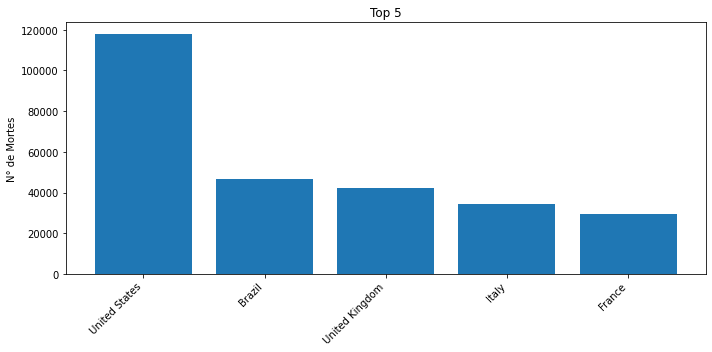

In [ ]:
# GRÁFICO DOS 5 PAÍSES COM MAIORES NÚEMROS DE MORTES POR COVID-19 REGISTRADAS

top5_mortes = global_casos_e_mortes.sort_values(by = ['total_deaths'], ascending = False)[1:6]

fig, ax = plt.subplots(figsize = (10,5))
ax.bar('location', 'total_deaths', data = top5_mortes)
ax.set_title('Top 5')
ax.set_ylabel('N° de Mortes')

plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()

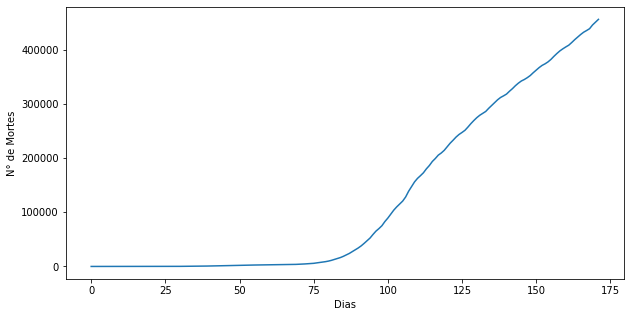

In [ ]:
# EVOLUÇÃO DOS CASOS DE COVID-19 NO MUNDO

df_evol = df_global.loc[df_global.location == "World", "total_deaths"].reset_index(drop = True)
df_evol.plot(figsize = (10,5))
plt.xlabel('Dias')
plt.ylabel('N° de Mortes')
plt.show()

### **ANÁLISE EXPLORATÓRIA PARA O BRASIL**

Inicialmente, vamos reduzir o nosso *dataset* original a fim de filtrar apenas as informações referentes ao Brasil.

In [ ]:
# SELECIONANDO UM NOVO DATAFRAME

df_brasil = df_global.loc[df_global.location == "Brazil", ["date","total_cases","total_deaths"]].reset_index(drop = True)
df_brasil = pd.DataFrame(df_brasil)

# CONVERTENDO OS DADOS DA COLUNA 'DATE' PARA O FORMAT DE DATAS DO PANDAS

df_brasil.date = pd.to_datetime(df_brasil.date)

df_brasil.set_index('date', inplace = True)

# VISUALIZANDO

df_brasil.head()

,total_cases,total_deaths
date,,
2019-12-31,0.0,0.0
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0


A partir desse novo *dataframe* chamado *'df_brasil'*, podemos analisar os casos de COVID-19 no Brasil, tendo um conjunto de dados mais "limpo".

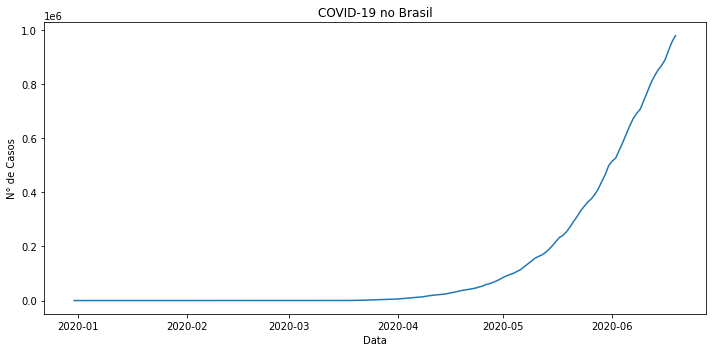

In [ ]:
# GRÁFICO DO NÚMERO DE CASOS DE COVID-19 NO BRASIL

fig, ax = plt.subplots(figsize = (10,5))

ax.plot('total_cases', data = df_brasil)
ax.set_title('COVID-19 no Brasil')
ax.set_xlabel('Data')
ax.set_ylabel('N° de Casos')

plt.tight_layout()

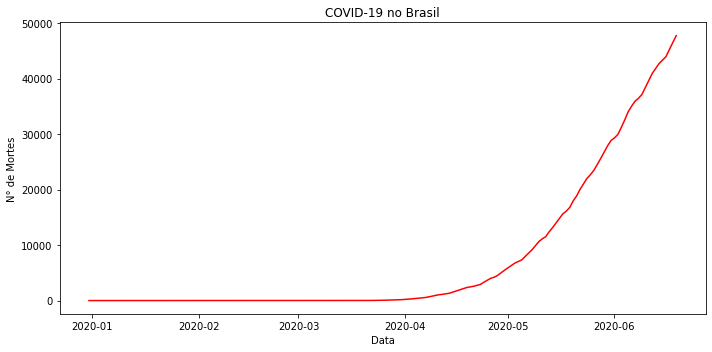

In [ ]:
# GRÁFICO DO NÚMERO DE MORTES POR COVID-19 NO BRASIL

fig, ax = plt.subplots(figsize = (10,5))

ax.plot('total_deaths','r' ,data = df_brasil)
ax.set_title('COVID-19 no Brasil')
ax.set_xlabel('Data')
ax.set_ylabel('N° de Mortes')

plt.tight_layout()

In [ ]:
# IDENTIFICANDO A DATA DO PRIMEIRO CASO CONFIRMADO DE COVID-19

first_case = df_brasil.loc[df_brasil.total_cases != 0, ['total_cases']].sort_values(by = 'total_cases', ascending = True)[:1]
first_case


,total_cases
date,
2020-02-26,1.0


In [ ]:
# IDENTIFICANDO A DATA DA PRIMEIRA MORTE CONFIRMADA POR COVID-19

first_death = df_brasil.loc[df_brasil.total_deaths != 0, ['total_deaths']].sort_values(by = 'total_deaths', ascending = True)[:1]
first_death

,total_deaths
date,
2020-03-18,1.0


O Brasil teve o primeiro caso confirmado da COVID-19 em **26-02-2020** e a primeira morte confirmada foi no dia **18-03-2020**

### **ANÁLISE PREDITIVA USANDO O PROPHET**

O Prophet trabalha com formatos específicos de colunas. Neste caso, devemos fornecer as informações nos seguintes padrões: ds e y A coluna ds deve estar no formato **AAAA-MM-DD** para datas e a coluna **y** deve ser numérica, esta representa a medida que deseja-se prever.

Assim, para implementar a ferramenta Prophet na nossa análise, deveremos escolher um único parâmetro para ser avaliado em relação ao tempo. Neste caso, devemos gerar um novo dataset e renomear as colunas para ds e y.

In [ ]:
# CRIANDO UM DATASET COM AS INFORMAÇÕES: DATA E MORTES CONFIRMADAS

prophet_mortes = df_brasil[['total_deaths']].reset_index()
prophet_mortes.columns = ['ds','y']
prophet_mortes.head()

,ds,y
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


Com o nosso dataframe no devido formato, podemos montar a nossa previsão usando o Prophet.

Iremos realizar as análises adotando um **intervalor de confiança de 95%**.

Admitir um determinado intervalo de confiança é essencial na análise de dados em Séries Temporais, uma vez que as tendências temporais dos dados mudam constantemente. Ou seja, devemos assumir que o futuro sofrerá mudanças. Nesta análise, assumiremos um **erro de 5%**.

In [ ]:
# CRIANDO A INSTÂNCIA DO PROPHET

m = Prophet(interval_width=0.95, yearly_seasonality=False, daily_seasonality=False) # SAZONALIDADES ANUAL E DIÁRIAS IGNORADAS

# Treinamento
# Neste caso, podemos passar todo o dataframe, ao invés de dividir em treino e teste

m.fit(prophet_mortes)

# Quantidade de dias desejados
dias = 30

futuro_mortes = m.make_future_dataframe(periods = dias)

In [ ]:
# VISUALIZANDO OS DIAS DE PREVISÃO GERADOS

futuro_mortes.tail(dias)

,ds
172,2020-06-20
173,2020-06-21
174,2020-06-22
175,2020-06-23
176,2020-06-24
177,2020-06-25
178,2020-06-26
179,2020-06-27
180,2020-06-28
181,2020-06-29


Perceba que, no dataframe **prophet_mortes** (antes de gerar os dias de previsão), a última data era 2020-06-19.
Agora, temos até o dia 2020-07-19, ou seja, **30 dias** depois, como especificado.

**E isso também pode ser feito para mais dias.**

In [ ]:
# GERANDO DATAFRAME COM PREVISÕES DO PROPHET

previsao_mortes = m.predict(futuro_mortes)

# Visualizando o dataframe gerado

previsao_mortes.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
172,2020-06-20,48215.892374,47963.580277,48602.180172,48200.864101,48232.114907,71.859721,71.859721,71.859721,71.859721,71.859721,71.859721,0.0,0.0,0.0,48287.752095
173,2020-06-21,49186.140287,48921.608747,49581.309278,49118.302406,49255.886985,66.133872,66.133872,66.133872,66.133872,66.133872,66.133872,0.0,0.0,0.0,49252.274159
174,2020-06-22,50156.388200,49778.631912,50455.176257,50018.256142,50286.792117,-42.431675,-42.431675,-42.431675,-42.431675,-42.431675,-42.431675,0.0,0.0,0.0,50113.956525
175,2020-06-23,51126.636113,50653.447248,51368.843343,50917.638380,51328.354507,-120.827840,-120.827840,-120.827840,-120.827840,-120.827840,-120.827840,0.0,0.0,0.0,51005.808273
176,2020-06-24,52096.884025,51622.976971,52466.073376,51793.440504,52378.399232,-51.983570,-51.983570,-51.983570,-51.983570,-51.983570,-51.983570,0.0,0.0,0.0,52044.900456
177,2020-06-25,53067.131938,52552.025184,53569.745132,52675.490426,53453.895808,0.076255,0.076255,0.076255,0.076255,0.076255,0.076255,0.0,0.0,0.0,53067.208194
178,2020-06-26,54037.379851,53613.146844,54705.826290,53511.095666,54542.017779,77.173236,77.173236,77.173236,77.173236,77.173236,77.173236,0.0,0.0,0.0,54114.553087
179,2020-06-27,55007.627764,54456.876321,55722.928250,54408.783873,55640.929829,71.859721,71.859721,71.859721,71.859721,71.859721,71.859721,0.0,0.0,0.0,55079.487485
180,2020-06-28,55977.875677,55278.204150,56771.376051,55269.349651,56711.362827,66.133872,66.133872,66.133872,66.133872,66.133872,66.133872,0.0,0.0,0.0,56044.009549
181,2020-06-29,56948.123590,56085.561596,57765.270315,56132.996577,57811.862930,-42.431675,-42.431675,-42.431675,-42.431675,-42.431675,-42.431675,0.0,0.0,0.0,56905.691915


As variáveis mais importantes para nós, neste momento, são:

*   **ds** (dias)
*   **yhat_lower** (previsão do número mínimo de mortes)
*   **yhat_upper** (previsão do número máximo de mortes)
*   **yhat** (previsão do número médio de mortes)

A partir dessas variáveis, podemos gerar os gráficos para enterdermos a previsão feita pelo Prophet.

Assim, devemos gerar um novo dataframe com essas variáveis e plotar um gráfico.

In [ ]:
# DATAFRAME - PREVISÃO

previsao_prophet = previsao_mortes[['ds','yhat_lower','yhat','yhat_upper']]
previsao_prophet.tail(7)

,ds,yhat_lower,yhat,yhat_upper
195,2020-07-13,67407.045684,70489.162695,73609.251184
196,2020-07-14,67977.988385,71381.014443,74564.737245
197,2020-07-15,68874.271235,72420.106625,75857.005581
198,2020-07-16,69861.762450,73442.414363,77047.315538
199,2020-07-17,70683.208071,74489.759257,78291.933912
200,2020-07-18,71428.340555,75454.693655,79561.310652
201,2020-07-19,72250.360592,76419.215719,80843.269724


### **PLOTANDO O GRÁFICO COM AS PREVISÕES**

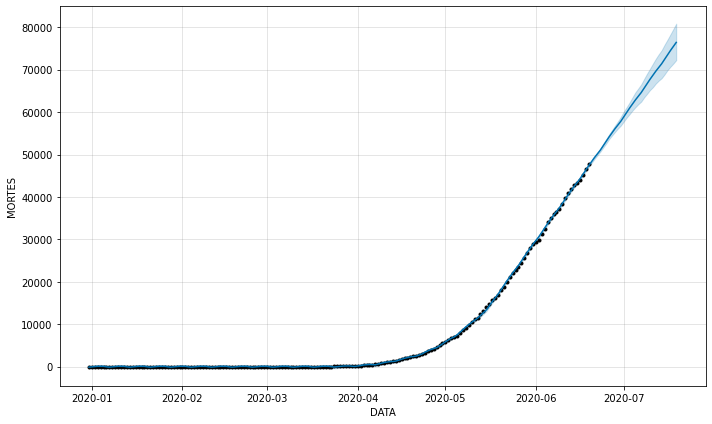

In [ ]:
# PREVISÃO PARA 15 DIAS

confirmed_forecast_plot = m.plot(previsao_prophet, xlabel = 'DATA', ylabel = 'MORTES')

O gráfico gerado acima nos mostra os dados atuais (bolinhas pretas), a previsão do Prophet (linha azul) e a margem para mínimo e máximo (faixa azul claro).

### **CONCLUSÕES**

Uma rápida análise dos dados da COVID-19 nos mostra números realmente assustadores. Atualmente, o mundo registra pouco mais de **8 milhões** de infectados. Onde os 5 países com mais infectados são:

País | Número de Infectados
--|--
Estados Unidos | **2.191.052**
Brasil |	**978.142**
Rússia | **561.091**
Índia	| **380.532**
Reino Unido	| **300.469**

Já os números de mortes por COVID-19 se apresentam da seguinte forma:

País | Número de Mortes
--|--
Estados Unidos | **118.434**
Brasil | **47.748**
Reino Unido | **42.288**
Itália | **34.514**
França | **29.603**

Apesar de muitos países já estarem aliviando suas medidas de isolamento e voltando a normalidade nas suas atividades, em decorrência do , alguns países, como o EUA e o Brasil, estão com seus números de infectados em constante crescimento.

Os dados mostram que os países que não aplicaram as medidas de isolamento com rigidez ou demoraram a tomar iniciativas para conter o avanço da COVID-19, atualmente, são os mais atingidos.


**Predição usando o Prophet**

Podemos concluir que o Prophet conseguiu prever de maneira precisa o comportamento das mortes no Brasil até o dia atual. Com isso, podemos esperar que o número de mortes que deverá ocorrer país até o dia 18-07-2020 esteja dentro da faixa da previsão do modelo.

De acordo com o modelo, a previsão do número de mortes até o dia **19-07-2020** poderá ser:

* Número mínimo de mortes: **72.250**
* Número médio de mortes: **76.419**
* Número máximo de mortes: **80.843**

Com isso, percebemos que os prováveis cenários para o número de mortes total no Brasil ainda é bem preocupante. Desta forma, devemos seguir as recomendações dos órgãos de saúde, da maneria mais rigorosa possível, para evitar que esses números cresçam.

A Ciência de Dados é uma poderosa aliada na guerra contra a COVID-19 e alguns experimentos já mostram a eficácia de algoritmos de Machine Learning e Deep Learning desenvolvidos ao longo dessa pandemia.